In [1]:
# from pathlib import Path

# repository_path = Path('..').resolve()

# !pip install -Uqq {repository_path}
# %pip install -e ..
    


# !export PYTHONPATH=$PYTHONPATH:{repository_path}
# !echo $PYTHONPATH

<a target="_blank" href="https://colab.research.google.com/github/Luan-vP/glider/blob/main/notebooks/walkthrough.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
import glider.visualize as visualize
import glider.vehicle as vehicle

import mediapy as media

# GliderSIM

Alrighty, now let's do the same with a pilot strapped to the bottom...

## The Gliders

Max wing dimension is 25m, and the wing mass is 5kg to roughly match a paraglider.

In [3]:
MAX_WING_DIMENSION_M = 25
WING_MASS_KG = 5

""

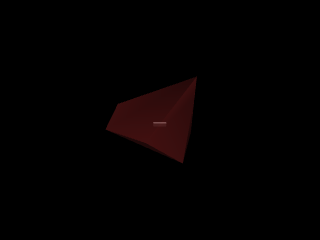

In [4]:
v = vehicle.Vehicle(
    num_vertices=10,
    max_dim_m=MAX_WING_DIMENSION_M,
    pilot=True,
    mass_kg=WING_MASS_KG,
    )
media.show_image(visualize.view_vehicle(*v.create_glider_from_vertices()))

## The Test

The test is a drop from 80m.

The glider's score is determined by the distance travelled to the left or right before it touches the landing platform.

The simulation uses the open source Physics simulator Mujoco, developed by DeepMind. A test for the glider above, looks like this:

In [5]:
import glider.simulation as simulation

test_xml_representation = simulation.drop_test_glider(
    *v.create_glider_from_vertices()
)

visualize.render_xml_to_collision(
    test_xml_representation,
    camera_name="fixed",
    show=True
)

We can get a numerical score for the gliders "fitness", by measuring the x-position at the time of collision. 

The wrapping `fitness_func` function includes the simulation steps and returns only numerical value we're interested in.

In [6]:
import glider.optimization as optimization

score = optimization.fitness_func(v)

print(f"Glider Score: {score}")

Glider Score: 0.09849208945867964


## Improving the glider shape

The first, and simplest way to get a better glider, is to try a variety of shapes. 

In the cell below, we create a population of gliders, and test each one according to our fitness function.

In [7]:
population = [vehicle.Vehicle(
    num_vertices=10,
    max_dim_m=MAX_WING_DIMENSION_M,
    mass_kg=WING_MASS_KG,
    pilot=True,
    ) for _ in range(100)]

fitnesses = [optimization.fitness_func(v) for v in population]

We can now select the best gliders according to the test, and see what they look like:

""

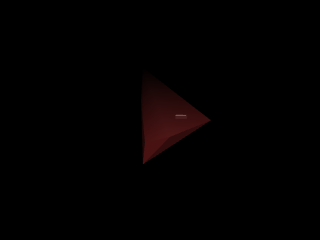

Fitness: 6.601925733917343


""

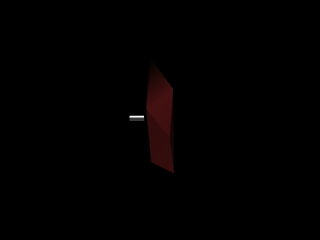

Fitness: 5.70330284948743


""

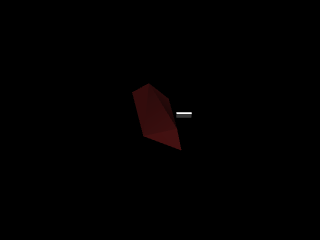

Fitness: 5.668010638725459


In [8]:
ranking = list(zip(population, fitnesses))
ranking.sort(key=lambda x: x[1], reverse=True)  # Sort by highest to lowest fitness

for glider, fitness in ranking[:3]:
    media.show_image(visualize.view_vehicle(*glider.create_glider_from_vertices()))
    print(f"Fitness: {fitness}")

Graphing the distribution of the glider performances, we get:

<Axes: ylabel='Frequency'>

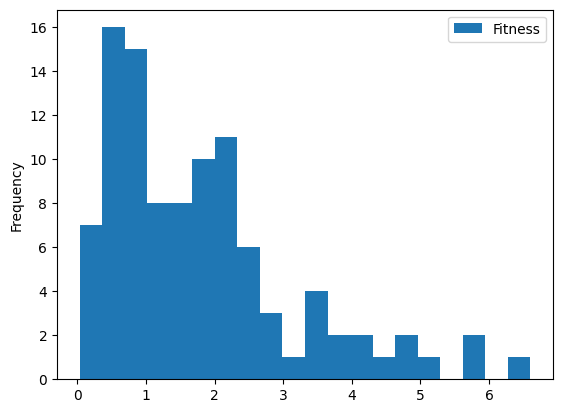

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(ranking, columns=["Vehicle", "Fitness"])
df.plot.hist(bins=20)

The drop test for the best glider, looked like this:

In [10]:
winning_glider, fitness = ranking[0]

drop_test_xml = simulation.drop_test_glider(*winning_glider.create_glider_from_vertices())

visualize.render_xml_to_collision(
    drop_test_xml,
    camera_name="fixed",
    show=True
)

These will be similar to the parents, but not the same, allowing us to whittle into adjacent niches.

Iteration: 0
Fitness: 5.233884645035965
Iteration: 10
Fitness: 9.461909529261428
Iteration: 20
Fitness: 9.461909529261428
Iteration: 30
Fitness: 9.461909529261428
Iteration: 40
Fitness: 9.461909529261428
Iteration: 50
Fitness: 9.461909529261428
Iteration: 60
Fitness: 9.461909529261428
Iteration: 70
Fitness: 9.461909529261428
Iteration: 80
Fitness: 9.461909529261428
Iteration: 90
Fitness: 9.461909529261428
Iteration: 100
Fitness: 9.461909529261428
Iteration: 110
Fitness: 9.461909529261428
Iteration: 120
Fitness: 9.461909529261428
Iteration: 130
Fitness: 9.461909529261428
Iteration: 140
Fitness: 9.461909529261428
Iteration: 150
Fitness: 9.461909529261428
Iteration: 160
Fitness: 9.461909529261428
Iteration: 170
Fitness: 9.461909529261428
Iteration: 180
Fitness: 9.461909529261428
Iteration: 190
Fitness: 9.461909529261428
Iteration: 200
Fitness: 9.461909529261428


/Users/luan/Developer/glider/.env/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


Iteration: 210
Fitness: 9.461909529261428
Iteration: 220
Fitness: 9.461909529261428
Iteration: 230
Fitness: 9.461909529261428
Iteration: 240
Fitness: 9.461909529261428
Iteration: 250
Fitness: 9.461909529261428
Iteration: 260
Fitness: 9.461909529261428
Iteration: 270
Fitness: 9.461909529261428
Iteration: 280
Fitness: 9.461909529261428
Iteration: 290
Fitness: 9.461909529261428


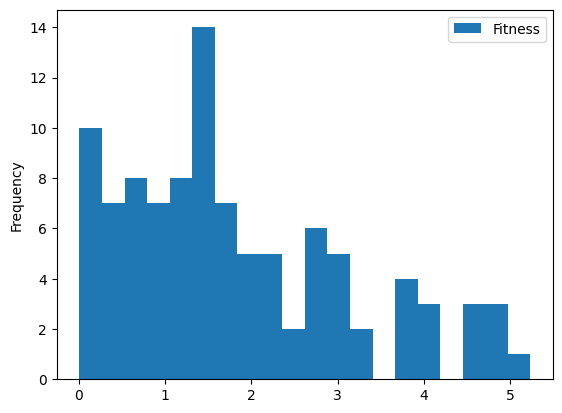

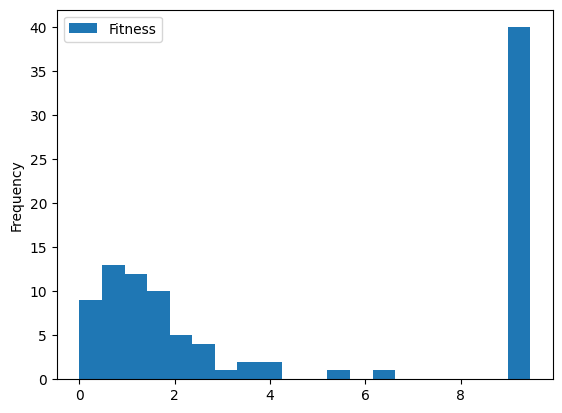

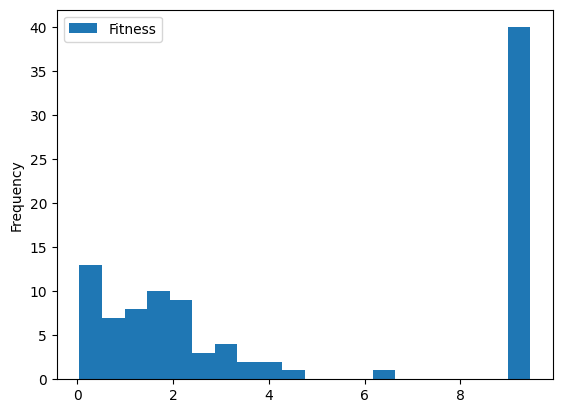

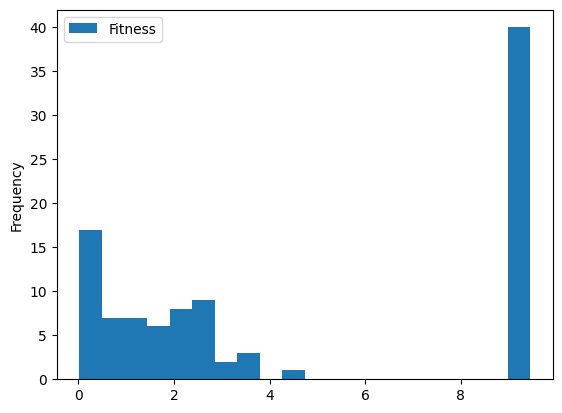

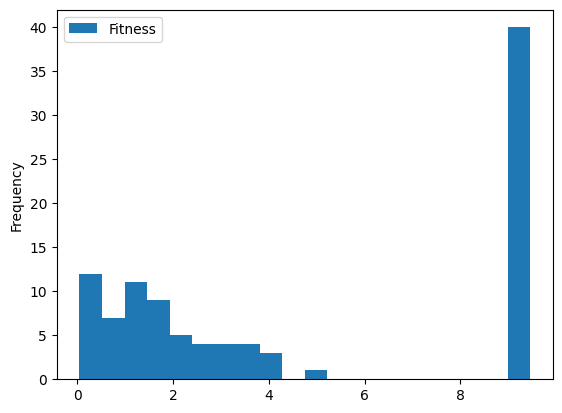

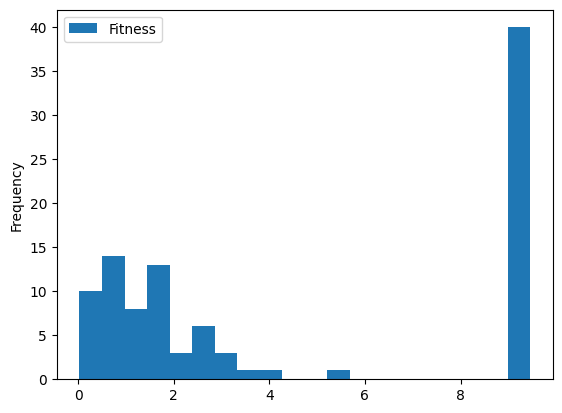

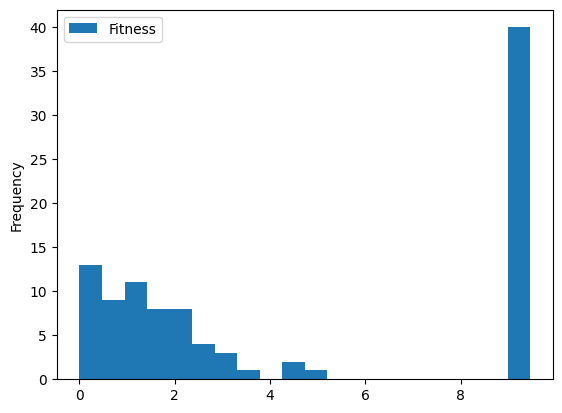

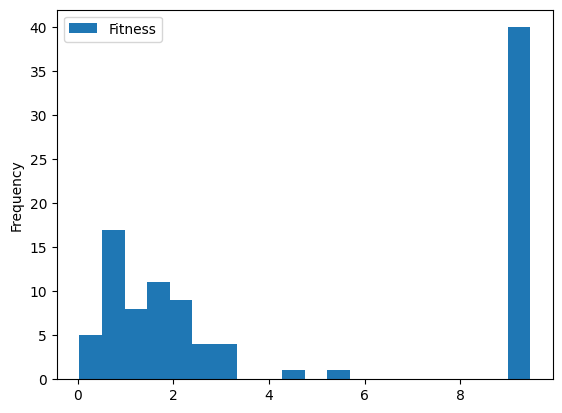

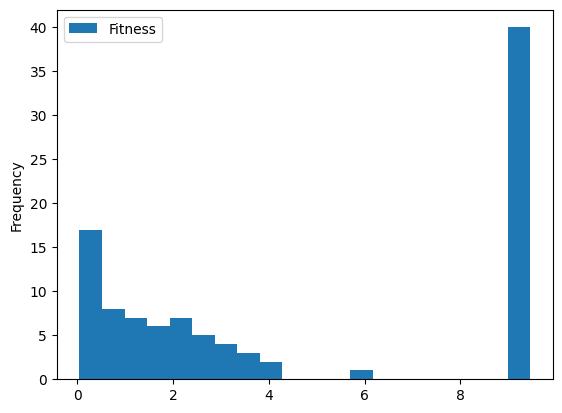

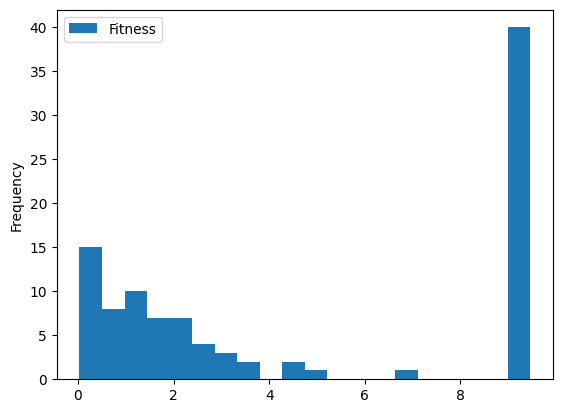

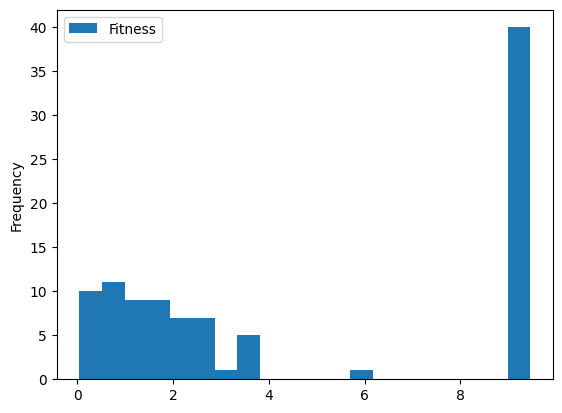

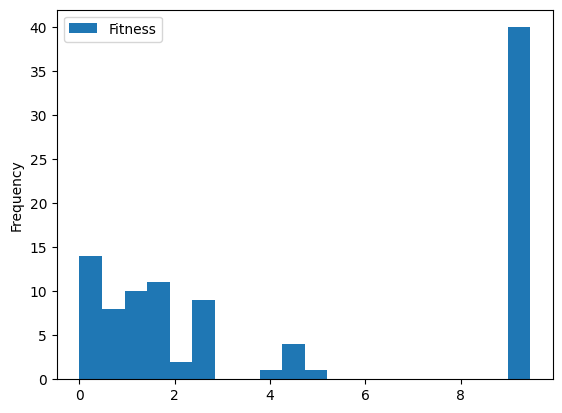

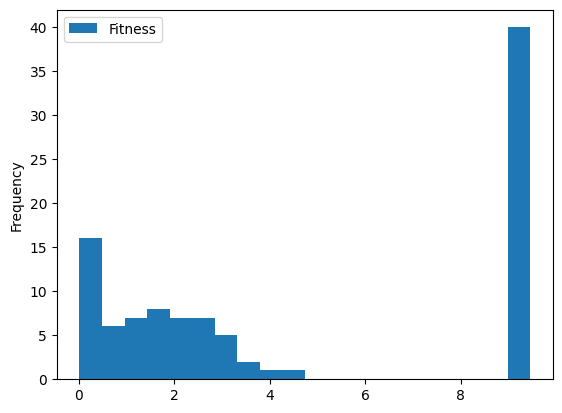

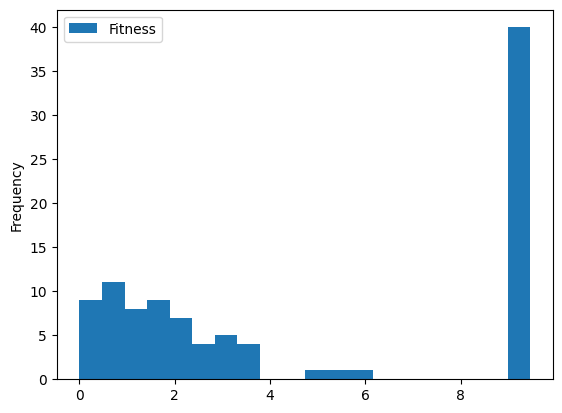

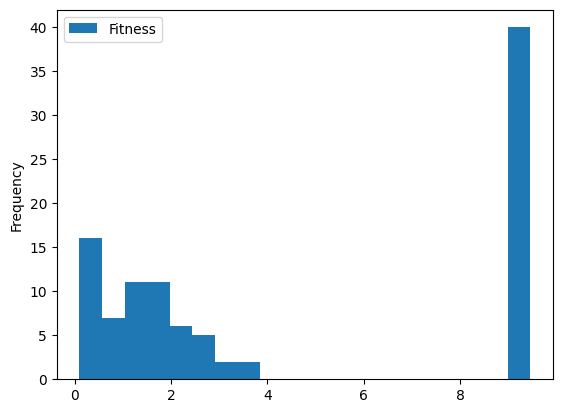

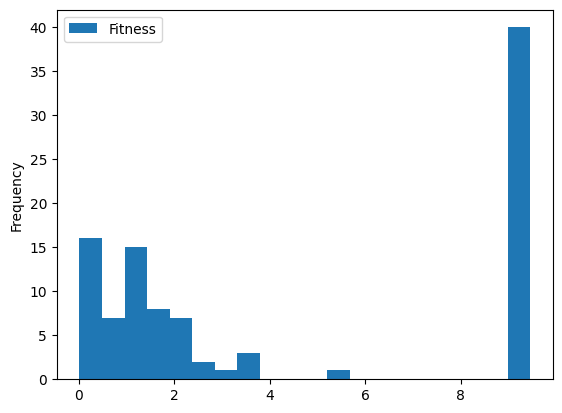

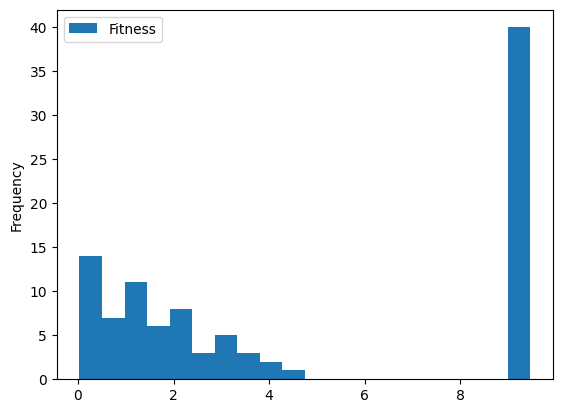

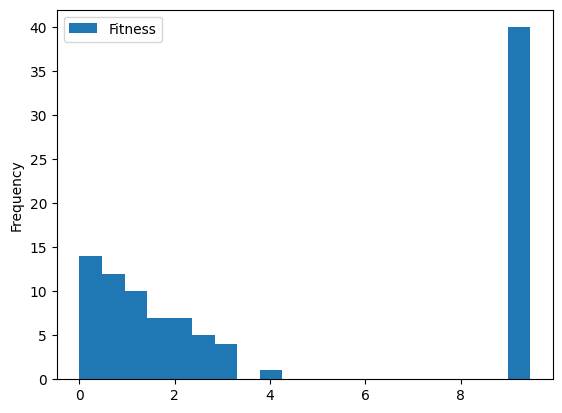

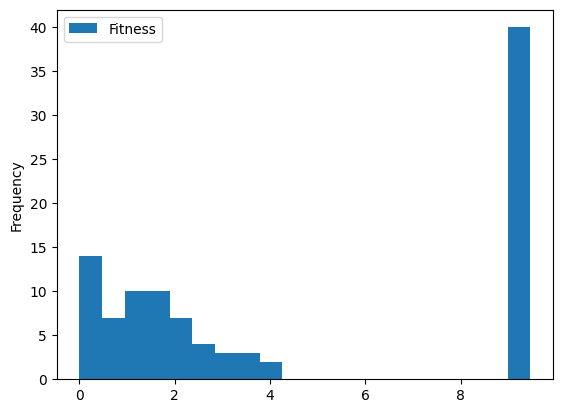

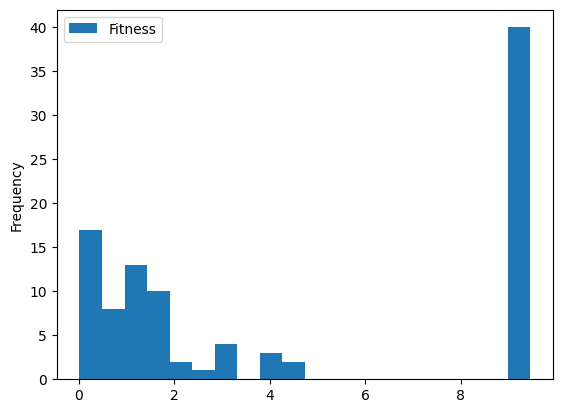

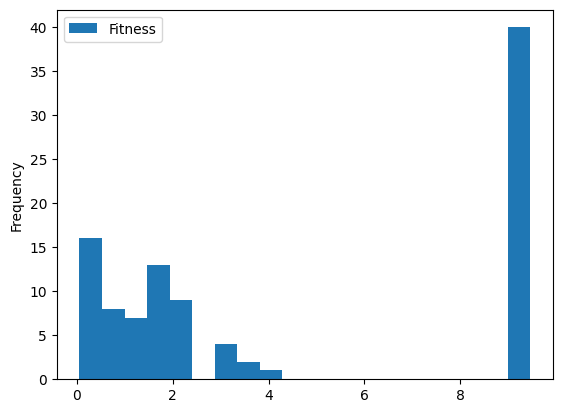

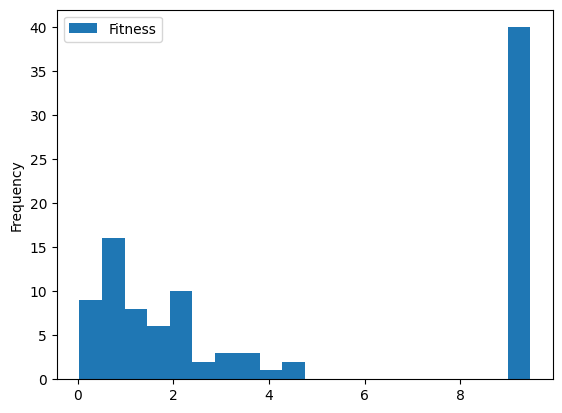

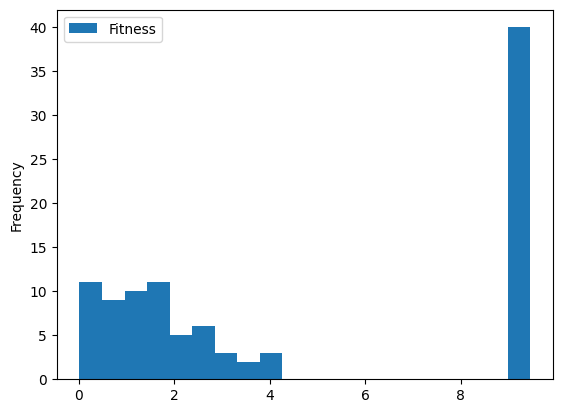

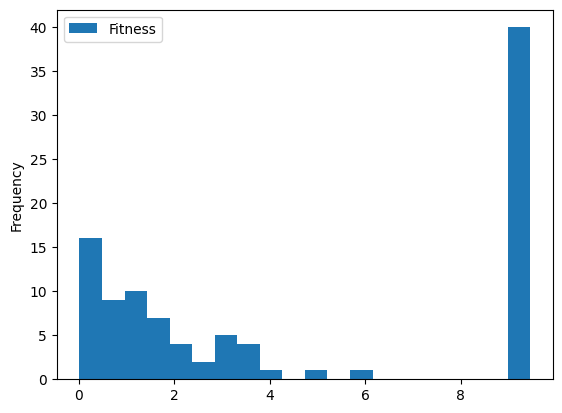

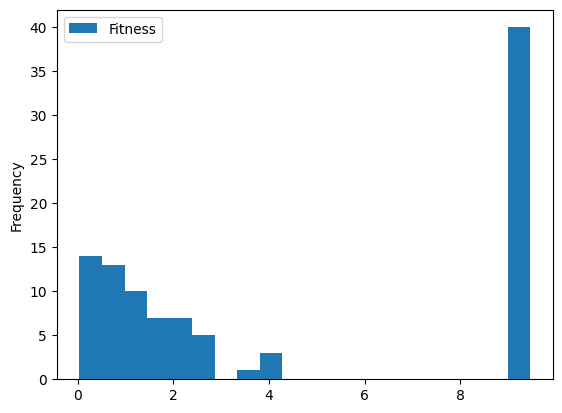

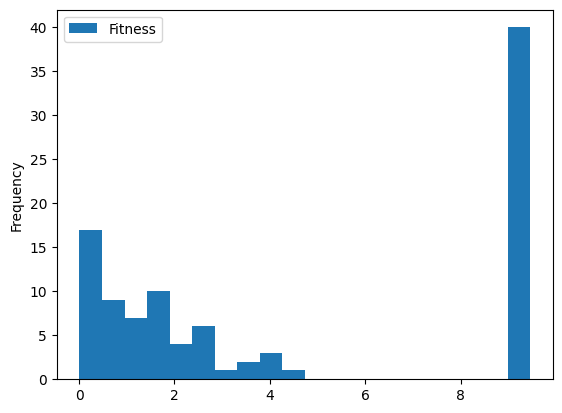

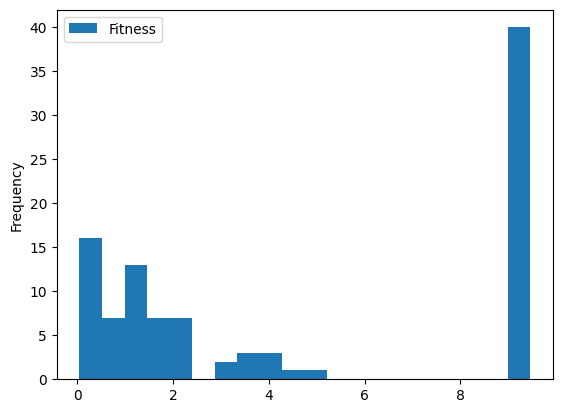

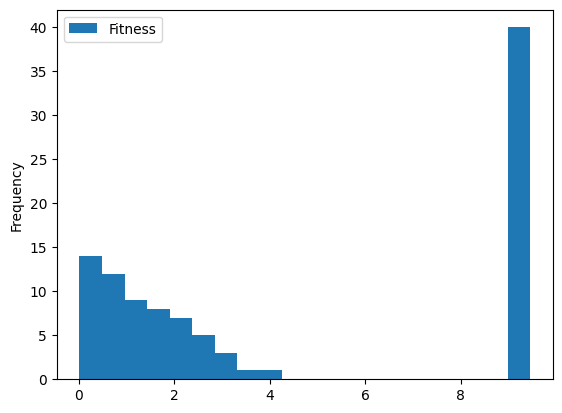

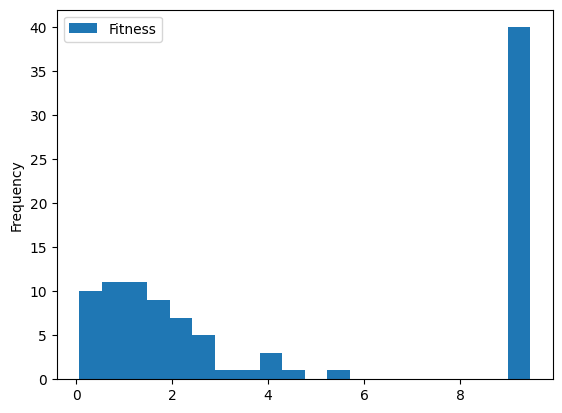

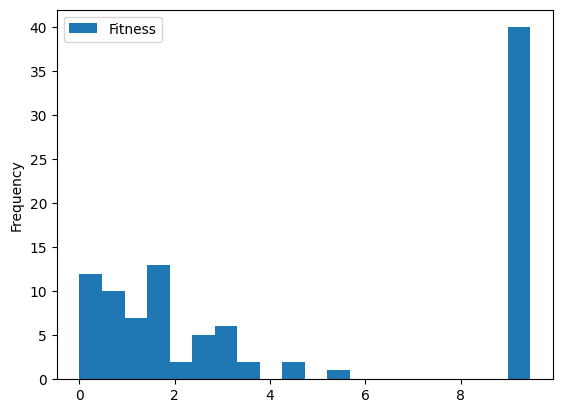

In [11]:
from io import BytesIO
import time

from glider.optimization import iterate_population, fitness_func
from glider.visualize import view_vehicle

best_glider_frames = []
population_performance_frames = []

population = [vehicle.Vehicle(
    num_vertices=10,
    max_dim_m=MAX_WING_DIMENSION_M,
    mass_kg=WING_MASS_KG,
    pilot=True,
    ) for _ in range(100)] 

for i in range(300):
    ranking, population = iterate_population(
        population=population,
        max_dim_m=MAX_WING_DIMENSION_M,
        survival_weight = 0.1,
        cloning_weight = 0.3,
        pilot=True,
        mass_kg=WING_MASS_KG,
    )

    best_glider_frames.append(view_vehicle(*population[0].create_glider_from_vertices()))
    
    if i % 10 == 0:
        print("Iteration:", i)
        winning_vehicle = population[0]
        print("Fitness:", fitness_func(winning_vehicle))
        df = pd.DataFrame(ranking, columns=["Vehicle", "Fitness"])
        df.plot.hist(bins=20)
        time.sleep(0.1)

        # media.show_image(view_vehicle(*winning_vehicle.create_glider_from_vertices()))

    


    


In [12]:
media.show_video(best_glider_frames, fps=3)

In [13]:
media.show_video(population_performance_frames, fps=3)

StopIteration: 

""

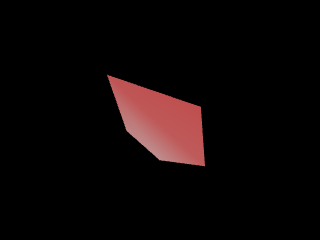

In [ ]:
v = population[0]
v.show()

In [ ]:
import glider.simulation as sim

test_xml_representation = simulation.drop_test_glider(
    *v.create_glider_from_vertices()
)

visualize.render_xml_to_collision(
    test_xml_representation,
    camera_name="fixed",
    show=True
)